In [3]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Homework3 Volve Field PETE 4241

####   Can you estimate the UCS versus depth for your assigned well in the Volve field. It is okay to use the internet to find any parameters needed for the identified lithologies encountered in the well. The appropriate equations from the Tables 4.1-4.4 should be used. It is okay for you all to collaborate on any homework involving the Volve field, since you all work on different wells
---

In [4]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1*g_cm3 #kg/m3
meter=1
mega=1e6 #Mega
Pa=1 #Pa
ms=0.000001 #us, micro seconds
psi=6894.76 


#Load and prepare the data
LogData = np.loadtxt('15_9-F-14_COMPOSITE_LOG.las', skiprows=53)
DZ=LogData[:,0]*ft
TP,TS=LogData[:,2]*ms/ft,LogData[:,3]*ms/ft
rhoB=LogData[:,4]*g_cm3

#Find common and continous available data
Index1=np.where(TS>0)[0]
Index2=np.where(TP>0)[0]
Index3=np.where(rhoB>0)[0]
Index=list(set(Index1) & set(Index2) & set(Index3))

DZ,TP,TS,rhoB=DZ[Index],TP[Index],TS[Index],rhoB[Index]

#DZ_Barnett=np.insert(DZ_Barnett,0,[0,z0-1e-6])
#rho_Barnett=np.insert(rho_Barnett,0,[rho_avg,rho_avg])

> ##### (b) Rock porosity
The rock porosity can be calculated using density log as follows:  
$$
\phi =\frac{\rho _m-\rho _b}{\rho _m-\rho _w}
$$

In [6]:
rho_w=1*g_cm3
rho_m=2.6878*g_cm3

phi=(rho_m-rhoB)/(rho_m-rho_w)
#Only preview 10 of them
showTables(X=[DZ/1e3],Y=[phi],
           XLables=['Depth_Barnett(km)'],
           YLabels=['Porosity_Barnett(-)'])

,Depth_Barnett(km),Porosity_Barnett(-)
0,2.782367,0.498400
1,2.866492,0.059189
2,2.950616,0.062448
3,3.042514,0.224612
4,3.126638,0.215902
5,3.235604,0.165719
6,3.365449,0.276514
7,3.449574,0.253585
8,3.533699,0.265257
9,3.617824,0.271655


> ##### (c) Compressional and Shear wave velocities (Vp and Vs) in m/s, which is just the inverse of transient time

In [7]:
Vp=1/TP
Vs=1/TS

showTables([DZ/1e3,Vp,Vs],
           XLables=['Depth_Barnett(km)','$V_p$ (m/s)','$V_s$ (m/s)'])

,Depth_Barnett(km),$V_p$ (m/s),$V_s$ (m/s)
0,2.782367,4461.828530,2302.161751
1,2.866492,4693.411516,2547.457682
2,2.950616,4293.435467,2319.092876
3,3.042514,3332.214578,2004.982197
4,3.126638,3692.813189,2165.574051
5,3.235604,3356.828194,1810.464341
6,3.365449,3457.118909,2037.396384
7,3.449574,3493.129491,2100.356813
8,3.533699,3444.920268,2019.326706
9,3.617824,3313.724232,1938.286435


> ##### (d) Shear modulus (G,MPa), Possion ratio and Youngs Modulus (E, MPa)
$$
G=\rho_bV_{s}^{2}
\\
\nu =\frac{V_{p}^{2}-2V_{s}^{2}}{2\left( V_{p}^{2}-V_{s}^{2} \right)}
\\
E=2G\left( 1+\nu \right) 
$$

In [9]:
G=rhoB*Vs*Vs
nu=(Vp**2-2*Vs**2)/2/(Vp**2-Vs**2)
E=2*G*(1+nu) 

showTables([DZ/1e3,G/mega,nu,E/mega],
           XLables=['Depth_Barnett(km)','$G$(MPa)','$v$','$E$(MPa)'])

,Depth_Barnett(km),$G$(MPa),$v$,$E$(MPa)
0,2.782367,9786.885321,0.318594,25809.854052
1,2.866492,16794.282231,0.291180,43368.869860
2,2.950616,13888.642415,0.294024,35944.478404
3,3.042514,9280.866896,0.216253,22575.769464
4,3.126638,10896.074470,0.237922,26976.975395
5,3.235604,7893.224742,0.294895,20441.802188
6,3.365449,9219.750618,0.233935,22753.140775
7,3.449574,9969.104853,0.216865,24262.112314
8,3.533699,9134.411738,0.238268,22621.696072
9,3.617824,8375.378232,0.239960,20770.275953


> ##### (e) UCS from sonic logs and also from bulk density log
|  Formation |   Depth  | Type      |     Sonic log Eqn  | 
|------------|----------|------     |  ------------------|
|Jurassic sands| 2700-3600| Sandstone |  $UCS=\exp \left( -6.36+\text{2.45}\log \left( 0.86V_p-1172 \right) \right) $  |


In [11]:
def UCS_Sonic(Depth,Vp):
    #Unit of UCS and E is MPa
    UCS=np.exp(-6.36+2.45*np.log10(0.86*Vp-1172))
    return UCS*mega


UCS_S=UCS_Sonic(DZ,Vp)

showTables([DZ/1e3,UCS_S/mega],
           XLables=['Depth_Barnett(km)','UCS_Sonic(MPa)'])

,Depth_Barnett(km),UCS_Sonic(MPa)
0,2.782367,7.637170
1,2.866492,8.245833
2,2.950616,7.196401
3,3.042514,4.714544
4,3.126638,5.638136
5,3.235604,4.777263
6,3.365449,5.033325
7,3.449574,5.125461
8,3.533699,5.002137
9,3.617824,4.667461


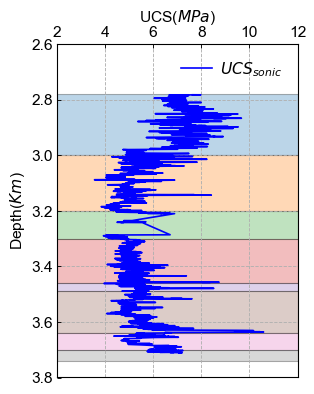

In [26]:
Block=[(2.78,3.0),(3.0,3.2),(3.2,3.3),(3.3,3.46),(3.46,3.49),(3.49,3.64),(3.64,3.7),(3.7,3.74)]
plotTables(Y=[DZ/1e3],X=[UCS_S/1e6],
           XLable='UCS($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$UCS_{sonic}$'],
           Xlim=[2,12],Ylim=[2.6,3.8],
           RegionShade=[Block],
           InvertY=True,img_fname='img.png')

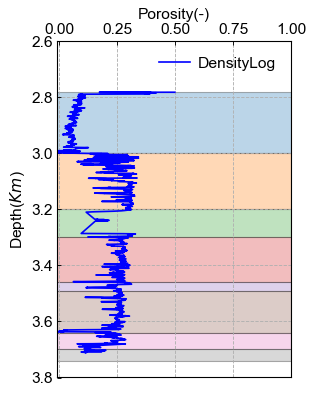

In [27]:
Block=[(2.78,3.0),(3.0,3.2),(3.2,3.3),(3.3,3.46),(3.46,3.49),(3.49,3.64),(3.64,3.7),(3.7,3.74)]
plotTables(Y=[DZ/1e3],X=[phi],
        XLable='Porosity(-)',YLabel='Depth($Km$)',
        Xlim=[-0.01,1],Ylim=[2.6,3.8],Alpha=[1,0.7],LineWidth=[1.5,1.0],
        RegionShade=[Block],
        DataNames=['DensityLog'],InvertY=True,img_fname='img.png')

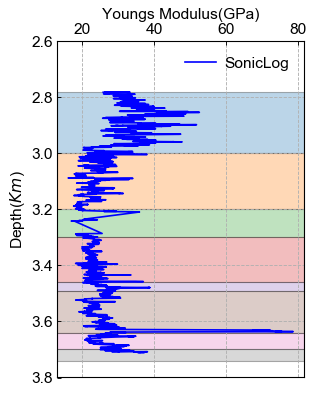

In [28]:
plotTables(Y=[DZ/1e3],X=[E/1e9],
        XLable='Youngs Modulus(GPa)',YLabel='Depth($Km$)',
        Ylim=[2.6,3.8],Alpha=[1,0.7],LineWidth=[1.5,1.0],
        RegionShade=[Block],
        DataNames=['SonicLog'],InvertY=True,img_fname='img.png')